In [1]:
import numpy      as np
import pandas     as pd
import tensorflow as tf
import seaborn    as sns
import matplotlib.pyplot as plt

In [2]:
inputs = tf.keras.layers.Input(shape=(784,), dtype=tf.float32)

In [3]:
(inputs.shape, inputs.dtype)

(TensorShape([None, 784]), tf.float32)

In [4]:
dense = tf.keras.layers.Dense(units=256, activation = 'relu')

In [5]:
(dense.units, dense.activation)

(256,
 <function tensorflow.python.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)>)

In [6]:
output = dense(inputs)

In [7]:
output = tf.keras.layers.Dense(units = 128, activation = 'relu', name = "Dense_Layer_2")(output)

In [8]:
y_pred = tf.keras.layers.Dense(units = 10 , activation = 'softmax', name = "softmax_layer")(output)

In [9]:
model = tf.keras.Model(inputs = inputs, outputs = y_pred, name = "my_first_model")

In [10]:
model.summary()

Model: "my_first_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
Dense_Layer_2 (Dense)        (None, 128)               32896     
_________________________________________________________________
softmax_layer (Dense)        (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


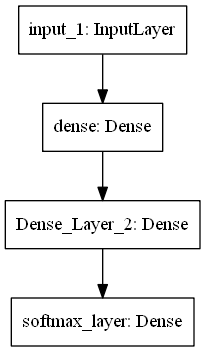

In [11]:
tf.keras.utils.plot_model(model, "my_model.png")

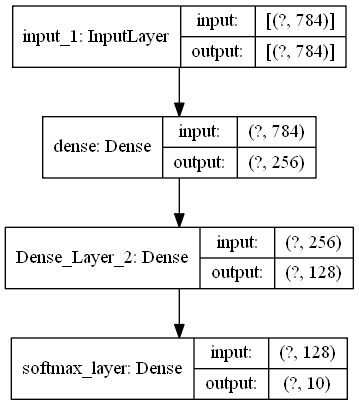

In [12]:
tf.keras.utils.plot_model(model, "my_model.png", show_shapes=True)

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [14]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 5s 6ms/step - loss: 1.5676 - accuracy: 0.9049 - val_loss: 1.5167 - val_accuracy: 0.9478
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 1.5113 - accuracy: 0.9520 - val_loss: 1.5126 - val_accuracy: 0.9504
Epoch 3/5
750/750 [==============================] - 5s 7ms/step - loss: 1.4987 - accuracy: 0.9644 - val_loss: 1.4994 - val_accuracy: 0.9626
Epoch 4/5
750/750 [==============================] - 6s 8ms/step - loss: 1.4909 - accuracy: 0.9711 - val_loss: 1.4991 - val_accuracy: 0.9630
Epoch 5/5
750/750 [==============================] - 5s 6ms/step - loss: 1.4864 - accuracy: 0.9754 - val_loss: 1.4973 - val_accuracy: 0.9643


In [ ]:
# history1 = model.fit(x_train, y_train, epochs=5, validation_split=0.2) #to check how epochs, batch work by default the batch size is 32

In [ ]:
# history2 = model.fit(x_train, y_train) #this will work with batch size as 32 and epoch as 1

In [ ]:
# history3 = model.fit(x_train, y_train, epochs=5)# this will work with batch size as 32

In [15]:
history.history

{'loss': [1.567562222480774,
  1.5113070011138916,
  1.4986871480941772,
  1.4908838272094727,
  1.4863765239715576],
 'accuracy': [0.9048749804496765,
  0.9519791603088379,
  0.9643750190734863,
  0.9711458086967468,
  0.9754375219345093],
 'val_loss': [1.5167466402053833,
  1.5125840902328491,
  1.4994421005249023,
  1.4991321563720703,
  1.4972630739212036],
 'val_accuracy': [0.9478333592414856,
  0.9504166841506958,
  0.9625833630561829,
  0.9629999995231628,
  0.9642500281333923]}

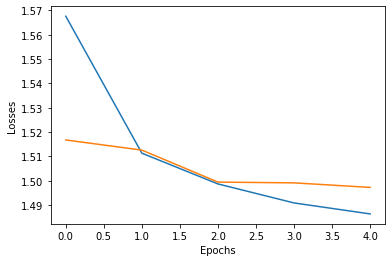

In [16]:
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.plot(history.history['loss'], )
plt.plot(history.history['val_loss'])
plt.show()

In [17]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 1.4976 - accuracy: 0.9632
Test loss: 1.497568964958191
Test accuracy: 0.9631999731063843
